# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

# Importing necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

from keras import models
from keras import layers
from keras import regularizers

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
data.shape

(205, 26)

Checking for missing data

In [4]:
data.isnull().sum() #if zero for all then no missing data.

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Data cleaning

In [5]:
#Splitting company name from CarName column

CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.head() 

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

*Replacing the misspelled car names in CompanyName column

In [7]:
data.CompanyName = data.CompanyName.str.lower()

def replace_name(a,b):
    data.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [8]:
#replacing words into digits in cylindernumber column

data = data.replace({'cylindernumber': {'two': 2, 'three': 3, 'four': 4, 'five': 5, 
                                        'six': 6, 'eight': 8,  'twelve': 12}})

In [9]:
#replacing words into digits in doornumber column

data = data.replace({'doornumber': {'two': 2, 'four': 4}})

using 'citympg' and 'highwaympg' a new feature can be created(fuel economy)

In [10]:
#Fuel economy
data['fueleconomy'] = (0.55 * data['citympg']) + (0.45 * data['highwaympg'])

# Visualizing data

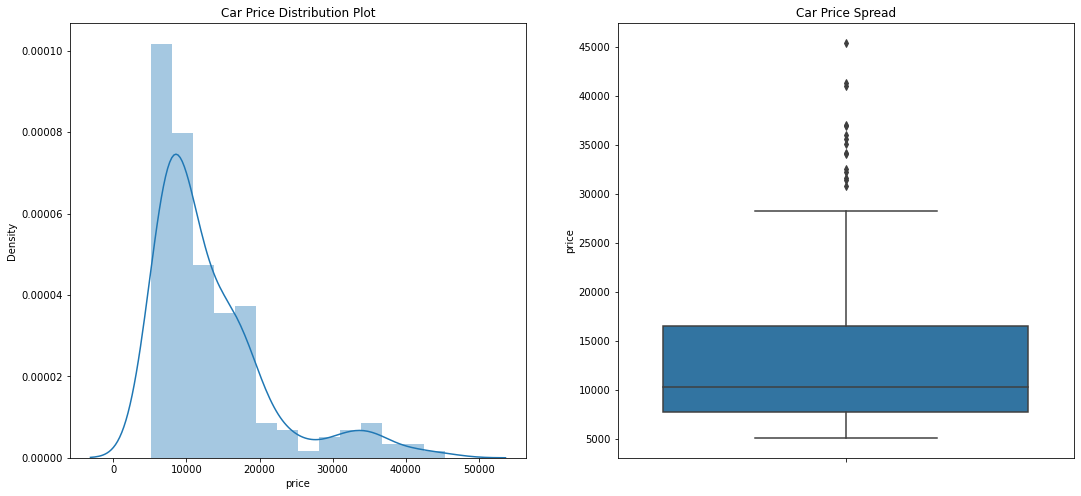

In [11]:
import warnings
warnings.filterwarnings('ignore')

#price column = target column

plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

In [12]:
print(data.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


Conclusions:
    
    1. Most of the prices are below 15,000.
    2. There is a significant difference between the mean and the median of the price distribution.

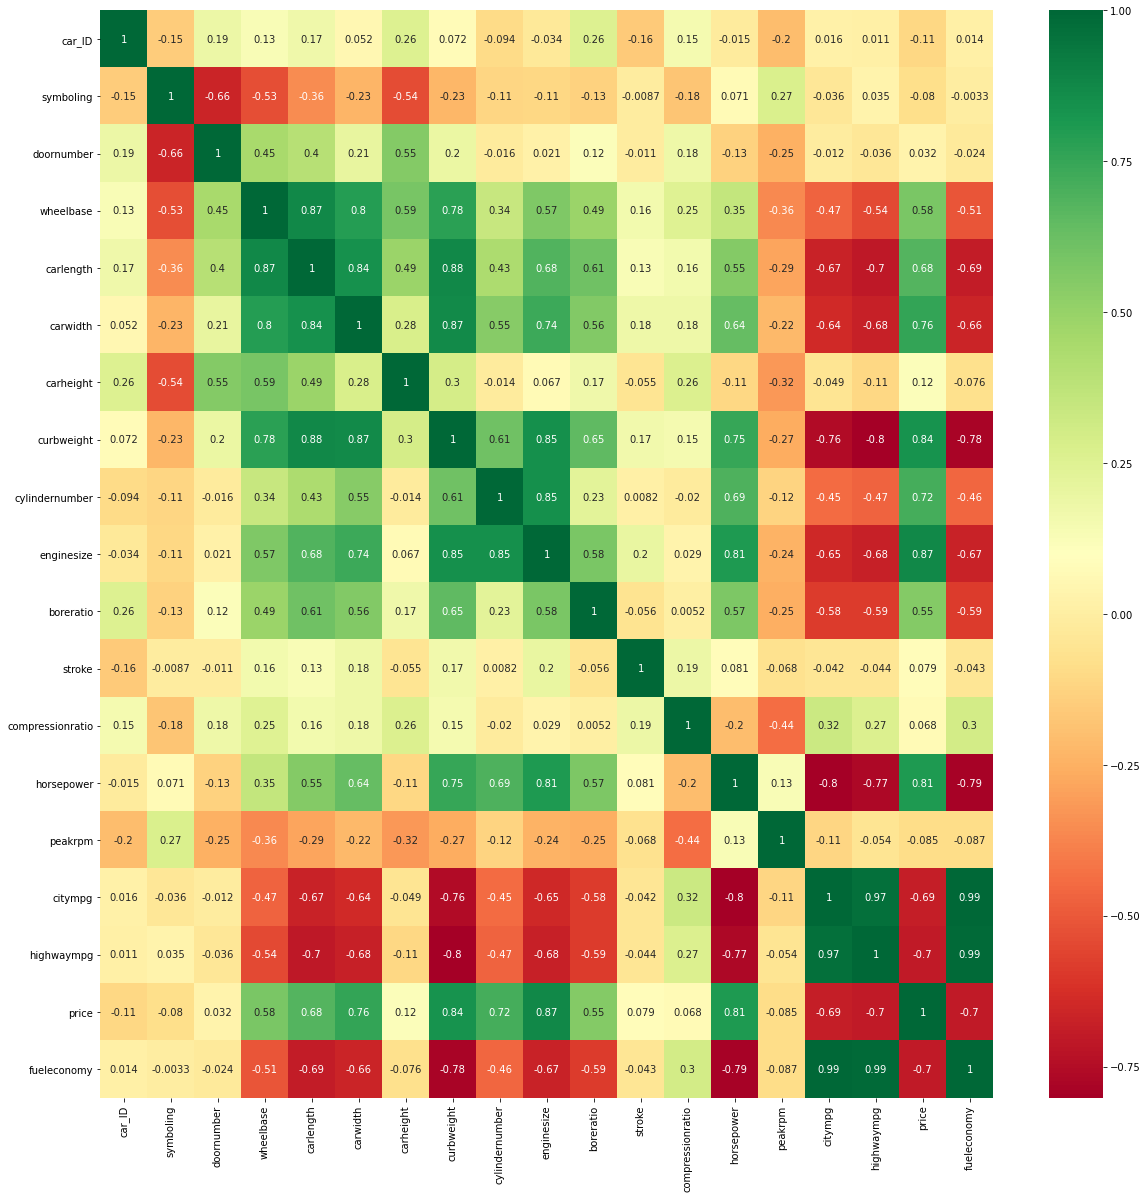

In [13]:
#to check which feature is more related to the target column

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


# Visualising categorical data

features:

- CompanyName
- fueltype
- enginetype
- carbody
- fuelsystem
- cylindernumber
- aspiration


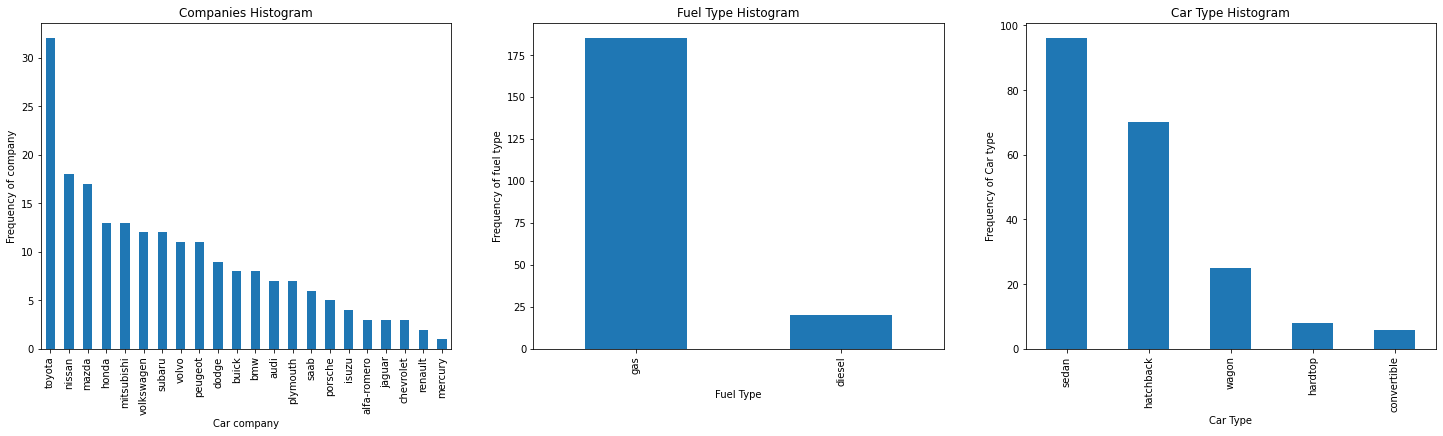

In [14]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = data.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = data.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

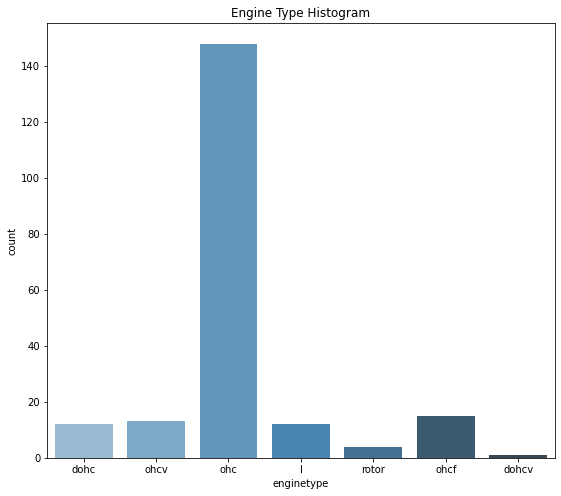

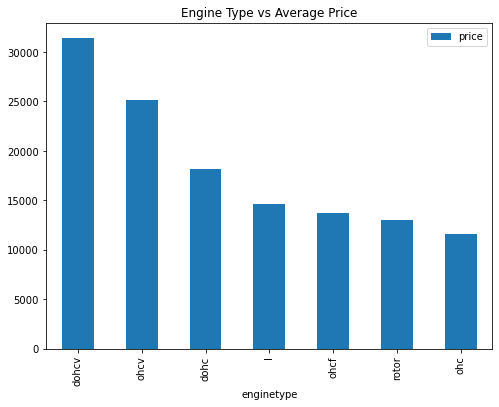

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(data.enginetype, palette=("Blues_d"))

df = pd.DataFrame(data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

*ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 1800x432 with 0 Axes>

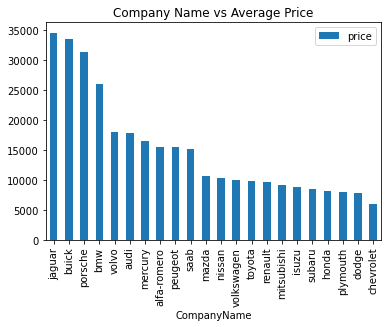

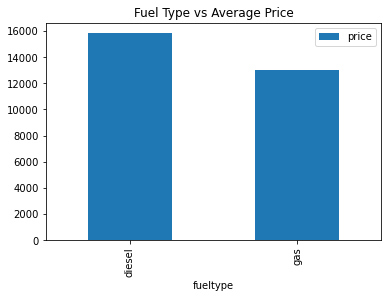

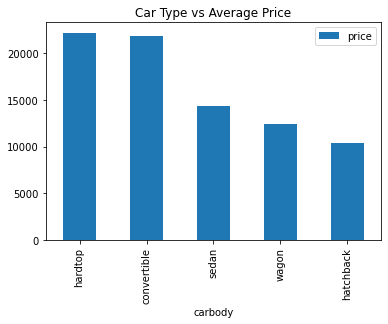

In [16]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(data.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

In [17]:
#Binning the Car Companies based on avg prices of each Company.

data['price'] = data['price'].astype('int')
temp = data.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
data['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


List of significant variables after Visual and correlation analysis :
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [18]:
cars_f = data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_f.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,4,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,4,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,6,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,4,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,5,136,3.19,115,19.80,176.6,66.4,Medium


# Encoding the non-numerical data

In [19]:
# Defining the map function

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the cars_f

cars_f = dummies('fueltype',cars_f)
cars_f = dummies('aspiration',cars_f)
cars_f = dummies('carbody',cars_f)
cars_f = dummies('drivewheel',cars_f)
cars_f = dummies('enginetype',cars_f)
cars_f = dummies('carsrange',cars_f)

In [20]:
cars_f.shape

(205, 26)

# Splitting data into test and train data

In [21]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_f, train_size = 0.7, test_size = 0.3, random_state = 100)

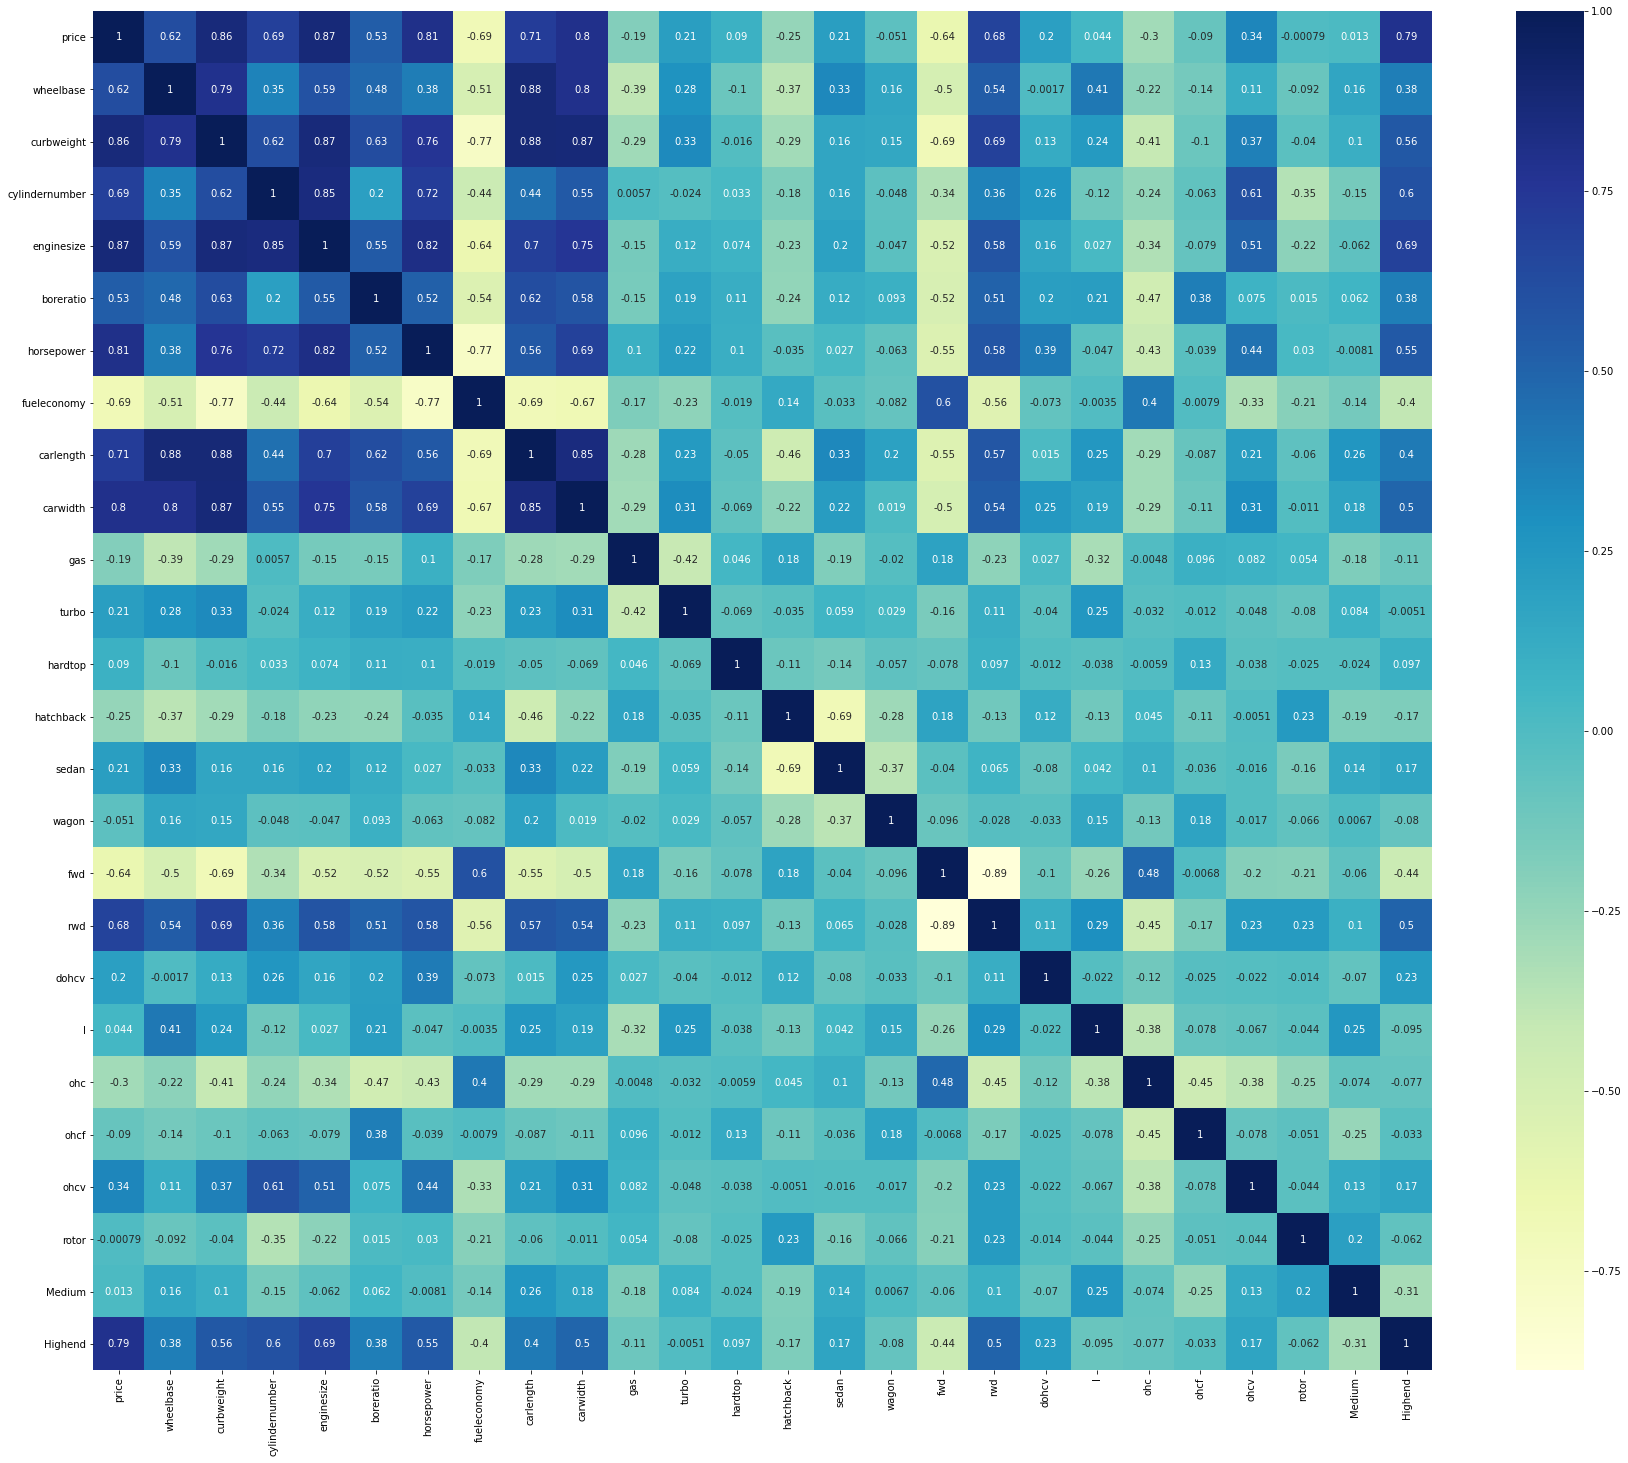

In [22]:
#Correlation of training dataset using heatmap

plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [23]:
#Dividing data into input(X) and output(y) variables

y_train = df_train.pop('price')
X_train = df_train

In [24]:
y_test = df_test.pop('price')
X_test = df_test

# Normalising the data

In [25]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

In [26]:
df_train.head()

,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,Medium,Highend
122,-0.808992,-0.639879,-0.3502,-0.657930,-1.292785,-0.869840,0.928057,-0.485531,-0.921261,0.31512,...,0.823153,-0.730667,-0.083624,-0.258253,0.675257,-0.3016,-0.258253,-0.169044,-0.835146,-0.366029
125,-0.674805,0.437876,-0.3502,0.635572,2.423737,1.018247,-0.775745,-0.358528,1.111072,0.31512,...,-1.206345,1.359041,-0.083624,-0.258253,0.675257,-0.3016,-0.258253,-0.169044,-0.835146,2.712920
166,-0.674805,-0.439751,-0.3502,-0.657930,-0.258289,0.237837,-0.075047,-0.374404,-0.830936,0.31512,...,-1.206345,1.359041,-0.083624,-0.258253,-1.470561,-0.3016,-0.258253,-0.169044,-0.835146,-0.366029
1,-1.664433,0.015587,-0.3502,0.123053,0.622948,0.212663,-0.613478,-0.366466,-0.785773,0.31512,...,-1.206345,1.359041,-0.083624,-0.258253,-1.470561,-0.3016,-0.258253,-0.169044,1.189022,-0.366029
199,0.968984,1.133735,-0.3502,0.123053,1.197668,1.496562,-1.269922,1.221072,0.614280,0.31512,...,-1.206345,1.359041,-0.083624,-0.258253,0.675257,-0.3016,-0.258253,-0.169044,1.189022,-0.366029


In [27]:
df_train.describe()

,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,Medium,Highend
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02
mean,-3.194026e-15,-1.708035e-16,-1.855548e-16,1.358665e-18,6.374078e-16,1.568287e-16,1.437855e-15,1.475122e-16,2.795588e-14,2.585345e-16,...,7.297970e-17,1.552759e-17,-9.898842e-18,-2.562053e-17,-9.006005e-17,-8.384901e-17,-2.259265e-16,-4.153632e-17,4.658278e-17,-1.009294e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.999900e+00,-1.930615e+00,-2.077050e+00,-1.560941e+00,-2.403909e+00,-1.373330e+00,-1.926365e+00,-2.565206e+00,-2.501966e+00,-3.151201e+00,...,-1.206345e+00,-7.306673e-01,-8.362420e-02,-2.582528e-01,-1.470561e+00,-3.015999e-01,-2.582528e-01,-1.690436e-01,-8.351462e-01,-3.660289e-01
25%,-6.748051e-01,-7.684019e-01,-3.502003e-01,-6.823356e-01,-9.287954e-01,-8.194913e-01,-8.568785e-01,-6.165033e-01,-8.535170e-01,3.151201e-01,...,-1.206345e+00,-7.306673e-01,-8.362420e-02,-2.582528e-01,-1.470561e+00,-3.015999e-01,-2.582528e-01,-1.690436e-01,-8.351462e-01,-3.660289e-01
50%,-3.393380e-01,-2.469666e-01,-3.502003e-01,-3.650615e-01,9.913581e-03,-2.153035e-01,-7.504715e-02,-1.124599e-01,-1.986539e-01,3.151201e-01,...,8.231532e-01,-7.306673e-01,-8.362420e-02,-2.582528e-01,6.752574e-01,-3.015999e-01,-2.582528e-01,-1.690436e-01,-8.351462e-01,-3.660289e-01
75%,4.490099e-01,7.178723e-01,-3.502003e-01,3.915152e-01,8.911505e-01,3.385353e-01,8.284844e-01,7.051223e-01,4.787907e-01,3.151201e-01,...,8.231532e-01,1.359041e+00,-8.362420e-02,-2.582528e-01,6.752574e-01,-3.015999e-01,-2.582528e-01,-1.690436e-01,1.189022e+00,-3.660289e-01
max,2.864374e+00,2.802695e+00,6.557199e+00,4.906570e+00,2.423737e+00,4.668548e+00,3.450570e+00,2.316474e+00,2.917591e+00,3.151201e-01,...,8.231532e-01,1.359041e+00,1.187464e+01,3.845097e+00,6.752574e-01,3.292465e+00,3.845097e+00,5.874265e+00,1.189022e+00,2.712920e+00


# Converting data into array type

In [28]:
X_train = X_train.values
X_train

array([[-0.808992  , -0.63987909, -0.35020032, ..., -0.16904361,
        -0.83514621, -0.36602887],
       [-0.67480513,  0.4378762 , -0.35020032, ..., -0.16904361,
        -0.83514621,  2.71291986],
       [-0.67480513, -0.43975076, -0.35020032, ..., -0.16904361,
        -0.83514621, -0.36602887],
       ...,
       [ 1.9250655 ,  1.79103745,  0.51322461, ..., -0.16904361,
        -0.83514621,  2.71291986],
       [-0.808992  , -1.05115197, -0.35020032, ..., -0.16904361,
        -0.83514621, -0.36602887],
       [ 1.22058443,  1.00337643,  0.51322461, ..., -0.16904361,
         1.18902173, -0.36602887]])

In [29]:
y_train = y_train.values
y_train

array([ 7609, 22018,  9538, 16500, 18950,  9980,  7499, 11248, 15750,
        7999,  6229, 18150, 13645,  8916,  6918,  6989, 34028,  6338,
       22625, 16430,  6575, 11199, 12629, 20970, 41315, 16558,  7099,
        5499,  8916,  8358, 17950, 11595, 13845,  8013,  6095,  9988,
        8845,  8058,  7895, 17710,  7395,  6692,  5572, 35550, 17859,
        7957,  7295, 16900,  5195, 10245, 11259,  7463,  6295, 12940,
       10945,  7775,  6377, 10345, 14399,  8195,  6529,  5389,  7957,
       15998, 17075,  7799, 14489, 15985,  7898, 34184, 15250,  7295,
        6785,  9258,  7975,  7053, 31600,  9895, 11694,  5348, 13495,
        6669, 11549, 28248, 12290,  6488,  6479, 18399, 21105, 35056,
       36880,  5151,  9095, 12440, 32250, 16695, 11845,  8558, 10795,
       10198, 19699,  6692, 16500,  9959, 13295, 10595, 36000, 15510,
       21485,  6649, 17450,  9549,  7126, 31400,  7788, 11850, 13200,
        8778,  9295,  8189,  7349, 18620,  9233, 15645,  8495, 11900,
        9960, 22470,

In [30]:
y_test = y_test.values
X_test = X_test.values

In [31]:
X_train.shape

(143, 25)

# Results after following the workflow suggested

After following the workflow suggested in this question:

    model-1 => input Layer (No. of features ), 
               3 hidden layers including 10,8,6 unit & 
               Output Layer with activation function relu.
    results => loss: 43525944.0000 - mae: 4461.3232(on test data)
    
    model-2 => input Layer (No. of features ), 
               1 hidden layers(10 units), regulizer(l2(0.001)) & 
               Output Layer with activation function relu.
    results => loss: 43526228.0000 - mae: 4343.8477(on test data)
    
The best result I got from a model was after using k-fold validation which was the right choice for our deep learning
model as we had very few data available. 

               

# using k_fold cross validation

In [32]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))

    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [33]:
k = 4
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([X_train[:i * num_val_samples], X_train[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# Results:

In [34]:
all_scores

[2496.835693359375, 1337.6168212890625, 1538.945556640625, 2658.793701171875]

In [35]:
np.mean(all_scores)

2008.0479431152344

# Checking performance of model at each epoch

In [37]:
num_epochs = 300
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([X_train[:i * num_val_samples],
                                         X_train[(i + 1) * num_val_samples:]],axis=0)

    partial_train_targets = np.concatenate([y_train[:i * num_val_samples], 
                                            y_train[(i + 1) * num_val_samples:]],axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [38]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

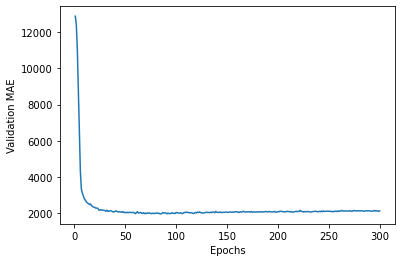

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

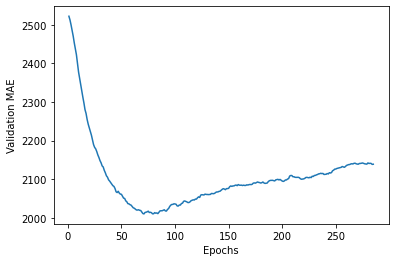

In [40]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[15:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# conclusion:

According to the above plot our Model's validation MAE stops improving significantly after 75 epochs. Which means our model overfits after 75th epoch

# Evaluation

Getting a fresh model with 75 epochs

In [41]:
model_f = build_model()
model_f.fit(X_train, y_train, epochs=75, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test, verbose=0, epochs=75)

In [42]:
test_mae_score

1735.1300048828125

In [43]:
test_mse_score

5687553.0

# Predictions

In [44]:
predictions = model_f.predict(X_test)

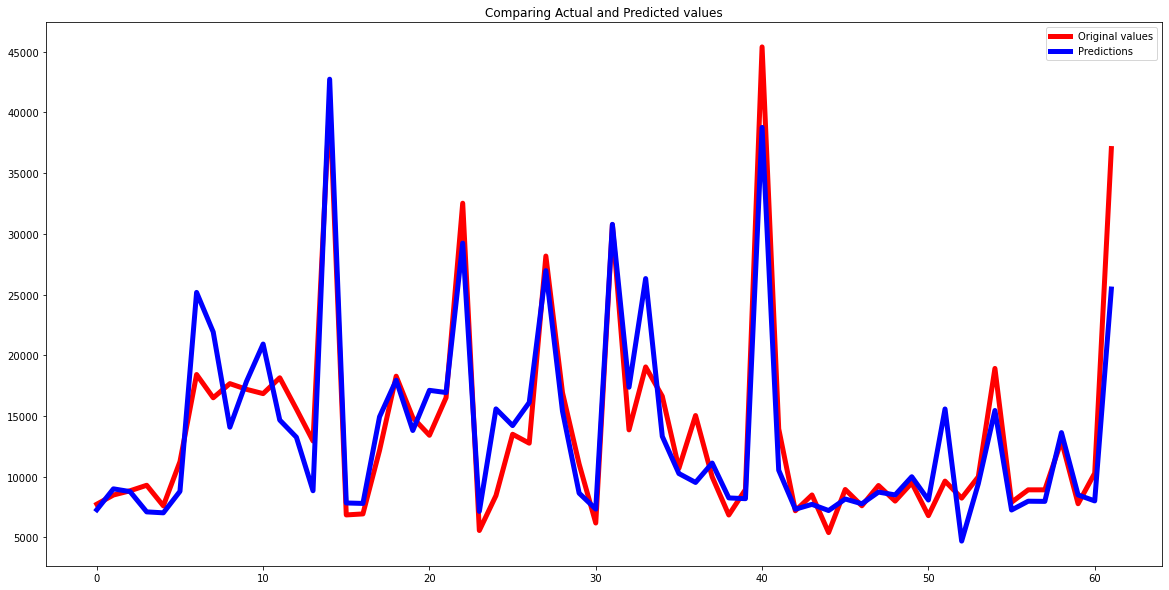

In [45]:
x = np.arange(62)
y1 = y_test

y2 = predictions

plt.figure(figsize=(20,10))
plt.plot(x, y1,  color='red', linewidth=5)
plt.plot(x, y2, color='blue', linewidth=5)

plt.title('Comparing Actual and Predicted values')
plt.legend(["Original values", "Predictions"])

In [46]:
ynew = model.predict(X_test)
# show the inputs and predicted outputs
for i in range(10):
    print("Actual=%s, Predicted=%s" % (y_test[i], ynew[i]))

Actual=7738, Predicted=[8516.859]
Actual=8495, Predicted=[8303.904]
Actual=8845, Predicted=[10706.124]
Actual=9298, Predicted=[9080.618]
Actual=7603, Predicted=[7312.4897]
Actual=11245, Predicted=[10741.426]
Actual=18420, Predicted=[21205.994]
Actual=16503, Predicted=[18284.254]
Actual=17669, Predicted=[16998.527]
Actual=17199, Predicted=[18320.49]
